In [12]:
from CollabFilterOneVectorPerItem import *
from AbstractBaseCollabFilterSGD import *
from train_valid_test_loader import load_train_valid_test_datasets

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
def parser(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith("epoch"):
                parts = line.split("|")
                epoch_data = [float(part.split()[-1]) for part in parts]
                data.append(epoch_data)

    
    columns = ["epoch", "loss_total", "train_MAE", "valid_MAE", "grad_wrt_mu", "grad_wrt_b_per_user", "grad_wrt_c_per_item", "grad_wrt_U", "grad_wrt_V"]
    df = pd.DataFrame(data, columns=columns)
    
    return df


In [15]:
def plot_mae_v_epoch(df):
    x = df['epoch']
    y_train = df['train_MAE']
    y_valid = df['valid_MAE']
    plt.plot(x, y_train, label='Train MAE')
    plt.plot(x, y_valid, label='Valid MAE')
    plt.xlabel('epoch')
    plt.ylabel('MAE')
    plt.title('MAE vs epoch')
    plt.grid()
    plt.show()
    

### Part 1A

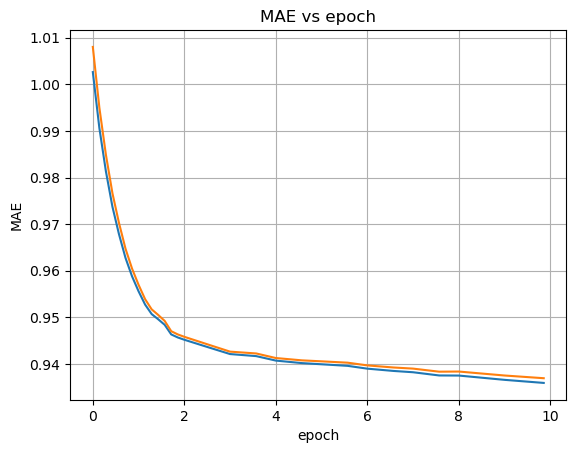

In [16]:
k2_df = parser("output_K2.txt")
plot_mae_v_epoch(k2_df)

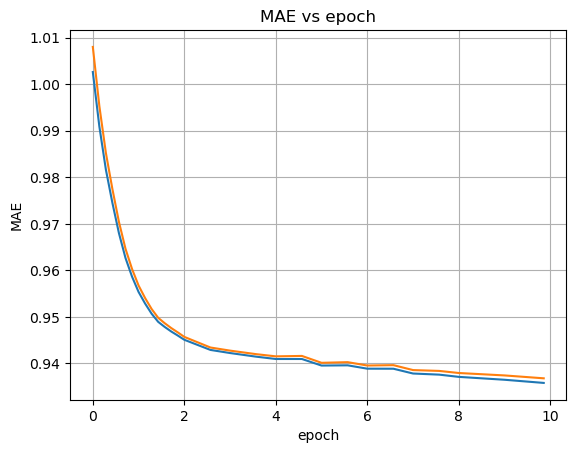

In [17]:
k10_df = parser("output_K10.txt")
plot_mae_v_epoch(k10_df)

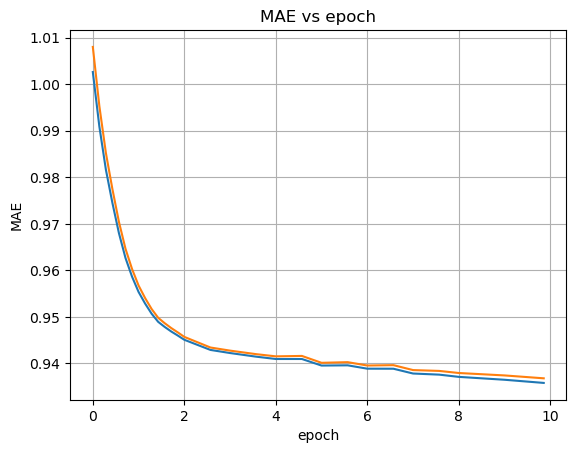

In [18]:
k50_df = parser("output_K10.txt")
plot_mae_v_epoch(k50_df)

### Part 1B

In [ ]:
import itertools

alpha = [0.001, 0.01, 0.1, 1, 10, 100]
batch_size = [50, 100, 500, 1000, 5000, 50000]
step_size = [0.001, 0.01, 0.1, 1, 10, 100]
combination = list(itertools.product(alpha, batch_size, step_size))

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

def callCombinations(currMin, bestIndex):
    n = len(combination)
    for index in range(n):
        print("trial ", index + 1)
        print("currMin ", currMin)
        a, b, s = combination[index]
        model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 50, alpha=a)
        model.init_parameter_dict(n_users, n_items, train_tuple)
        model.fit(train_tuple, valid_tuple)
        minValid = min(model.trace_mae_valid)
        if currMin > minValid:
            currMin = minValid
            bestIndex = index
        print("new currMin ", currMin)
    return currMin, bestIndex

currMin, bestIndex = callCombinations(float("inf"), 0)

trial  1
currMin  inf
new currMin  0.9291202112580241
trial  2
currMin  0.9291202112580241
new currMin  0.8384409643414319
trial  3
currMin  0.8384409643414319
new currMin  0.7552454025342064
trial  4
currMin  0.7552454025342064


/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:33: RuntimeWarning: overflow encountered in multiply
  defvjp(anp.multiply,    lambda ans, x, y : unbroadcast_f(x, lambda g: y * g),
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:34: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: x * g))
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/brandonmukadziwashe/CS135/cs135-24f-assignments/CS-135-Project-B/AbstractBaseCollabFilterSGD.py:225: RuntimeWarning: invali

new currMin  0.7552454025342064
trial  5
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  6
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  7
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  8
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  9
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  10
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  11
currMin  0.7552454025342064


/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:698: RuntimeWarning: invalid value encountered in at
  onp.add.at(A, idx, x)


new currMin  0.7552454025342064
trial  12
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  13
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  14
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  15
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  16
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  17
currMin  0.7552454025342064


/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:58: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(x, lambda g: g * y * x ** anp.where(y, y - 1, 1.)),


new currMin  0.7552454025342064
trial  18
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  19
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  20
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  21
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  22
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  23
currMin  0.7552454025342064


/Users/brandonmukadziwashe/CS135/cs135-24f-assignments/CS-135-Project-B/AbstractBaseCollabFilterSGD.py:72: RuntimeWarning: overflow encountered in square
  mse = np.mean(np.square(yhat_N - ratings_N))


new currMin  0.7552454025342064
trial  24
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  25
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  26
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  27
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  28
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  29
currMin  0.7552454025342064


/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:698: RuntimeWarning: overflow encountered in at
  onp.add.at(A, idx, x)


new currMin  0.7552454025342064
trial  30
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  31
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  32
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  33
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  34
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  35
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  36
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  37
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  38
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  39
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  40
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  41
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  42
currMin  0.7552454025342064


/Users/brandonmukadziwashe/CS135/cs135-24f-assignments/CS-135-Project-B/AbstractBaseCollabFilterSGD.py:225: RuntimeWarning: overflow encountered in multiply
  arr[:] = arr - self.step_size * grad_dict[key]


new currMin  0.7552454025342064
trial  43
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  44
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  45
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  46
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  47
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  48
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  49
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  50
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  51
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  52
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  53
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  54
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  55
currMin  0.7552454025342064
new currMin  0.7552454025342064
trial  56
currMin  0.7552454025342064
new currMin  0.75524

currMin = 